<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg">
<center>
<p>
<h1>Algorítmica Avanzada</h1>
<h2>Problemas 1.C - Grafos </h2>
</center>
</p>
</div>


<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>0 - Detección de ciclos</p></h2>
  
  <p>
  En este ejercicio deberéis implementar un algoritmo capaz de detectar si un grafo cualquiera contiene ciclos.
  </p>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center> 

<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Este es el grafo que utilizaremos para buscar ciclos.</li>
</ul>
<br>
<h3>OUTPUT</h3>
<ul>
<li>__ _'TF'_ __: Booleano indicando si el grafo de entrada contiene algún ciclo.</li>
<ul>

</p>

</div>

In [6]:
from queue import Queue
def cycles(G):
    #Aplicar DFS o BFS y cuando se encuentre un nodo en visitado significarà que habrà un ciclo
    TF = False
    explorado = []
    a = []
    q = Queue()
    q.put(0)
    
    while not q.empty():
        nodo = q.get() # Obtener la ultima posicion
        a.append(nodo)
        
        if(nodo not in explorado):
            explorado.append(nodo)
            
        for neighbour in G.neighbors(nodo):
            if neighbour not in explorado :
                q.put(neighbour)
                explorado.append(neighbour)
                print(neighbour,nodo)
            elif neighbour not in a:
                TF = True
    
    
    return TF

[0, 1, 2, 3, 4]
[(0, 1), (1, 2), (1, 4), (2, 3)]
0
1 0
1
2 1
4 1
2
3 2
4
3


False

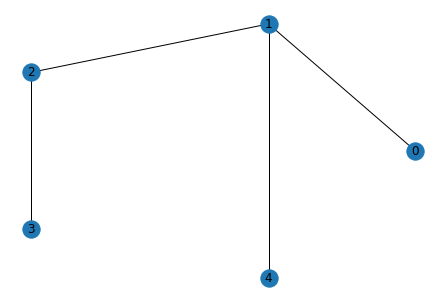

In [7]:
%matplotlib inline
import networkx as nx
G = nx.generators.barabasi_albert_graph(5, 1)
print(G.nodes())
print(G.edges())
nx.draw_circular(G, with_labels=True)
cycles(G)

<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>1 - Circuito Euleriano</p></h2>
  <p>
  Se define como circuito euleriano aquel que pasa por todas las aristas de un grafo una única vez y que acaba en el mismo lugar en el que empieza. El problema de los caminos eulerianos fué la base de toda la teoría de grafos y fué postulado por Lehonard Euler en el famoso problema de __los siete puentes de Königsberg__. En este problema Euler se preguntaba si podía acabar en el mismo sitio tras cruzar todos los puentes una sola vez.
  </p>
  <img src="img/konigsberg.jpg"></img>
  <p>
  En este ejercicio se os propone implementar un algoritmo que, dado un grafo _G_ encuentre un camino euleriano.
  </p>

<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center> 

<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Objeto de tipo grafo sobre el cual queremos encontrar el circuito Euleriano.</li>
</ul>
<br>
<h3>OUTPUT</h3>
<ul>
<li>__ _nodelist_ __: Una lista de nodos ordenados que formarían el circuito.</li>
<ul>

</p>

</div>

In [8]:
def euler(G):
    
    nodelist = list()
    graph = G.copy()
    
    start = list(G.nodes)[0]
    nodelist.append(start)

    while len(graph.edges) > 0:
        actual = nodelist[-1]
        for edge in graph.edges:
            if actual in edge:
                if edge[0] == actual:
                    actual = edge[1]
                elif edge[1] == actual:
                    actual = edge[0]
                else:
                    return "Graf no euleria"

                graph.remove_edge(*edge)
                nodelist.append(actual)
                break
    return nodelist

<div class="alert alert-warning">
<h1>Pregunta</h1>
<p><strong>
¿Qué condiciones se deben de cumplir para que un grafo cualquiera contenga un camino euleriano? Demuéstralo.
</strong></p>
</div>
Si todos los vertices son de grado par o si el numero de vertices de grado impar son pares.
 

<div class="alert alert-warning">
<h1>Extra</h1>
<p><strong>
Además de circuitos Eulerianos, definimos caminos Eulerianos aquellos que recorren todas las aristas de un grafo sin repetirlas, pero no termina en el mismo nodo que empieza. Modifica el algoritmo anterior para que sea capaz de detectar si el grafo contiene un ciclo o un camino Euleriano, y devuelva la lista de nodos ordenados que componen dicho ciclo o camino. Tened en cuenta que son casos excluyentes.
</strong></p>
</div>

In [1]:
from random import choice

def euler_path(G):
    # Check if has euler cycle or path
    odd = []
    kind = ''
    for node in G.nodes:
        if G.degree(node) % 2: odd.append(node)
        if len(odd) > 2: break
    if len(odd) == 0: kind = 'cycle'
    elif len(odd) == 2: kind = 'path'
    else: return [], None
   
    # Visited EDGES
    visited = set()
   
    cycles = []
    if kind == 'cycle': # Random starting node
        path = [choice(list(G))]
    elif kind == 'path': # start at node with odd degree
        path = [choice(odd)]
    while len(visited) != len(G.edges):
        node = path[-1]
        neighs = list(G.neighbors(node))
        already_visited = 0
        for neigh in neighs:
            edge = tuple(sorted([node, neigh]))
            # Pick unvisited edge
            if edge not in visited:
                path.append(neigh)
                visited.add(edge)
                break
            else:
                # Count how many neighs have already been visited
                already_visited += 1
               
        # No more edges from this node, we're trapped!! D:
        if len(neighs) == already_visited:
            cycles.append(path)
            # search next node on path
            for node in path:
                # All neighbours of the node
                edges = set([tuple(sorted([node, n])) for n in G.neighbors(node)])
                # Intersect edges with visited
                unvisited = edges - visited
                if unvisited: # If any edge "survived" the intersection, we still 've got edges to visit
                    path = [node]
                    break
                   
    # Reconstruct path from cycles
    if kind == 'cycle': path = []
    for c in cycles:
        if not path: path = c # first
        else:
            idx = path.index(c[0])
            path = path[:idx] + c + path[idx+1:]
    return path, kind